In [97]:
import pandas as pd

In [98]:
# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
X_test = pd.read_csv('/aiffel/data/test.csv')
y_test = pd.read_csv('/aiffel/data/y_test.csv')


train.shape, test.shape, y_test.shape

((39116, 16), (9779, 15), (9779, 1))

## EDA (탐색적 데이터 분석)
---
탐색적으로 데이터를 살펴보자

In [99]:
# 데이터 크기
train.shape, y_test.shape

((39116, 16), (9779, 1))

In [100]:
# 데이터 샘플 뽑기
display(train.head(2))
display(X_test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [101]:
# 데이터 시리즈 별 타입 탐색하기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [102]:
# 결측치 있는지 확인해보자 (train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [103]:
# 결측치 있는지 확인해보자 (test)
X_test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

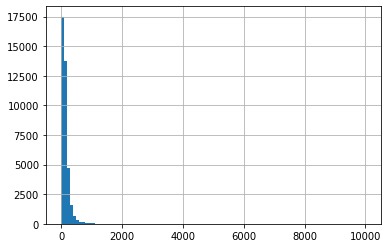

In [104]:
# 타겟 데이터를 확인해보자 - 히스토그램으로 시각화
train['price'].hist(bins=100)

In [105]:
# 타겟 데이터를 확인해보자 - describe()
# 기초통계 내주는 메서드
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [106]:
# 특정 피처 탐색
# host_id 컬럼에서 중복허용하지 않고 값이 몇 개 있는지 센다
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

In [107]:
# # 결측치 컬럼 삭제(last_review) - 컬럼 자체를 삭제

train= train.drop(columns=['last_review'])
# train= train.drop(columns=['review_per_month'])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  reviews_per_month               

In [108]:
# 결측치 채우기
# 1) name, host_id 의 결측치를 unknown으로 채우기
# train.info()

train.isnull().sum()

# train['name'] = train['name'].fillna('unknown')
# train['host_name'] = train['host_name'].fillna('unknown')



id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [109]:
# 결측치 채우기
# 2) 'review_per_month', 'last_review'의 결측치를 0으로...



train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
X_test['reviews_per_month'] = X_test['reviews_per_month'].fillna(0)


# is_nan_train = train[X_test.isna().any(axis=1)]
# is_nan_X_test = X_test[X_test.isna().any(axis=1)]



In [110]:
# 가격 값 복사
# [[YOUR CODE]]
import numpy as np
y_train = train['price']

X_train = train.drop('price', axis=1) # train데이터에서 price 시리즈만 따로 떼어 X_train 변수에 할당한다.
X_train.shape, y_train.shape


((39116, 14), (39116,))

In [111]:
# 수치형 피처 선택 X_train, X_test
# X_train, X_test 데이터에서 수치로 된 것만 떼어낸다.

# [[YOUR CODE]]
X_train = X_train.select_dtypes(include=['int64','float64'])
X_test = X_test.select_dtypes(include=['int64','float64'])

X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   host_id                         39116 non-null  int64  
 2   latitude                        39116 non-null  float64
 3   longitude                       39116 non-null  float64
 4   minimum_nights                  39116 non-null  int64  
 5   number_of_reviews               39116 non-null  int64  
 6   reviews_per_month               39116 non-null  float64
 7   calculated_host_listings_count  39116 non-null  int64  
 8   availability_365                39116 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 2.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
--- 

In [112]:
print(type(X_train),type(y_train),type(X_test),type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [120]:
y_train = pd.DataFrame({'price':y_train})
y_train


,price
0,70
1,240
2,150
3,85
4,44
...,...
39111,185
39112,50
39113,120
39114,165


In [121]:
# 데이터 전처리 - 스탠다드 스케일링
from sklearn.preprocessing import MinMaxScaler
sclaer = MinMaxScaler()

print(type(X_train),type(y_train),type(X_test),type(y_test))


# 데이터프레임으로 바꿔주기
X_train = sclaer.fit_transform(X_train)
y_train=sclaer.fit_transform(y_train)
X_test=sclaer.fit_transform(X_test)
y_test=sclaer.fit_transform(y_test)


# print(type(X_train),type(y_train),type(X_test),type(y_test))

# X_train = pd.DataFrame(X_train)
# y_train = pd.DataFrame(y_train)
# X_test = pd.DataFrame(X_test)
# y_test = pd.DataFrame(y_test)





<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [122]:
print(type(X_train),type(y_train),type(X_test),type(y_test))
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(39116, 9) (39116, 1) (9779, 9) (9779, 1)


In [123]:
# 머신러닝(회귀)
# [[YOUR CODE]]
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
X_train.shape, y_train.shape

model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)


# 0.0005284114111744957



0.0005284114111744957

In [124]:
# 릿지 회귀
# [[YOUR CODE]]
from sklearn.linear_model import Ridge
model = Ridge()

model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

# 0.0005281897237701802

0.0005281897237701802

In [125]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
model = Lasso()

model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)
# [[YOUR CODE]]

# 0.000545931236426702


0.000545931236426702

In [126]:
# 엘라스틱넷 회귀
# [[YOUR CODE]]
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

model = ElasticNet(alpha=0.04, l1_ratio=0.6)

model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

# 0.000545931236426702

0.000545931236426702

In [128]:
# 랜덤포레스트
# [[YOUR CODE]]
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

# 0.00051570972418959

/tmp/ipykernel_147/1680083495.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.0005245700147158196

In [129]:
# Xgboost
# [[YOUR CODE]]

from xgboost import XGBRegressor
model = XGBRegressor()

model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

# 0.0006306734557890445

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


0.0006306734557890445

In [ ]:
y_test2 = pd.read_csv('/aiffel/data/y_test.csv')
y_test2

In [ ]:
y_test2.isnull().sum()

In [135]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')


# Xgboost
# GridSearch로 최적의 파라미터 값을 찾아보자

from sklearn.model_selection import RandomizedSearchCV

params={'learning_rate':[0.07, 0.05], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }

grid = RandomizedSearchCV(model, params, cv = 3, n_iter=10, n_jobs=-1)
grid.fit(X_train, y_train)

grid.best_params_

# pred = model.predict(X_test)

# mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


{'subsample': 0.9, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05}

In [139]:
                
                
from xgboost import XGBRegressor
xgb = XGBRegressor(
    subsample= 0.9,
    n_estimators=200,
    max_depth=5,
    learning_rate= 0.05
)

xgb.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)


77873.30739916426